In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
seeds = [41,42,64,72,122]
LIST_of_model_histories = []

In [3]:
def load_model_history(model_type, seed, epoch_num):
    filename = "Image_Model_histories/" + model_type + "_seed_" + str(seed) + "_epoch_" + str(epoch_num) + ".pkl"
    with open(filename, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return history

In [4]:
LIST_of_model_histories = []
modelName = "M1"
for seed in seeds:
    try:
        LIST_of_model_histories.append(load_model_history(modelName, seed, 10))
    except:
        LIST_of_model_histories.append(load_model_history(modelName, seed, 60))



In [5]:
len(LIST_of_model_histories)

5

FileNotFoundError: [Errno 2] No such file or directory: 'Image_Model_histories/M2_seed_42_epoch_60.pkl'

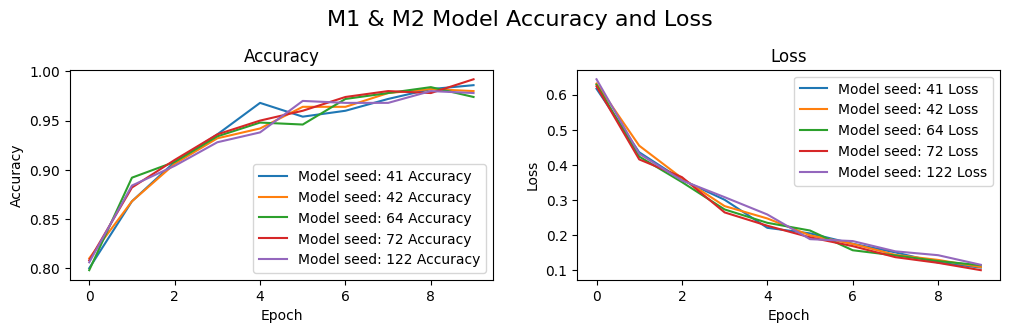

In [6]:
plt.figure(figsize=(12, 6))

#make a big title
plt.suptitle(f'M1 & M2 Model Accuracy and Loss', fontsize=16)

plt.subplot(2, 2, 1)
i=0
for histories in LIST_of_model_histories:
    plt.plot(histories['accuracy'], label=f'Model seed: {seeds[i%5]} Accuracy')
    i += 1
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
i=0
for histories in LIST_of_model_histories:
    plt.plot(histories['loss'], label=f'Model seed: {seeds[i%5]} Loss')
    i += 1
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

LIST_of_model_histories = []
modelName = "M2"
for seed in seeds:
    try:
        LIST_of_model_histories.append(load_model_history(modelName, seed, 100))
    except:
        LIST_of_model_histories.append(load_model_history(modelName, seed, 60))

plt.subplot(2, 2, 3)
i=0
for histories in LIST_of_model_histories:
    plt.plot(histories['accuracy'], label=f'Model seed: {seeds[i%5]} Accuracy')
    i += 1
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
i=0
for histories in LIST_of_model_histories:
    plt.plot(histories['loss'], label=f'Model seed: {seeds[i%5]} Loss')
    i += 1
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
LIST_of_w1_w2 = []
modelName = "W1_W2"
for seed in seeds:
    LIST_of_w1_w2.append(load_model_history(modelName, seed, 10))

In [ ]:
LIST_of_w1_w2[0]

In [ ]:
plt.figure(figsize=(12, 6))

#make a big title
plt.suptitle(f'{modelName} Model Accuracy and Loss', fontsize=16)

i=0
for histories in LIST_of_w1_w2:
    plt.plot(histories, label=f'Model seed: {seeds[i%5]} Accuracy')
    i += 1
plt.title('Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
average_of_w1_w2 = []
length = len(LIST_of_w1_w2[0])
for i in range(length):
    tmp = 0
    for j in range(len(LIST_of_w1_w2)):
        tmp += LIST_of_w1_w2[j][i]
    average_of_w1_w2.append(tmp/len(LIST_of_w1_w2))

In [ ]:
plt.figure(figsize=(12, 6))

#make a big title
plt.suptitle(f'{modelName} Model Accuracy and Loss', fontsize=16)

plt.plot(average_of_w1_w2, label=f'Model seed: {seeds[i%5]} Accuracy')
plt.title('Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [4]:
def parse_data_from_comparison_results(file_name):
    file_path = f'ComparisonResults/{file_name}'
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extracting model seed
    model_seed = lines[0].split(':')[1].strip()
    
    # Extracting accuracies
    accuracies = {}
    for line in lines[1:]:
        parts = line.split(':')
        if len(parts) == 2:
            accuracies[parts[0].strip()] = float(parts[1].strip())

    return model_seed, accuracies

In [5]:
# Names of the files in "ComparisonResults" directory
file_names = [
    'text_seed:41.txt',
    'text_seed:42.txt',
    'text_seed:64.txt',
    'text_seed:72.txt',
    'text_seed:122.txt'
]

# Parsing data from all files in "ComparisonResults"
plot_data = {}
for file_name in file_names:
    model_seed, accuracies = parse_data_from_comparison_results(file_name)
    plot_data[model_seed] = accuracies

In [6]:
plot_data

{'41\t\t\tTest Accuracy': {'w_L Test Accuracy': 0.4975000023841858,
  'w_U Test Accuracy': 0.5074999928474426,
  'w_F Test Accuracy': 0.48750001192092896},
 '42\t\t\tTest Accuracy': {'w_L Test Accuracy': 0.5199999809265137,
  'w_U Test Accuracy': 0.5224999785423279,
  'w_F Test Accuracy': 0.4975000023841858},
 '64\t\t\tTest Accuracy': {'w_L Test Accuracy': 0.5024999976158142,
  'w_U Test Accuracy': 0.5024999976158142,
  'w_F Test Accuracy': 0.47999998927116394},
 '72\t\t\tTest Accuracy': {'w_L Test Accuracy': 0.5024999976158142,
  'w_U Test Accuracy': 0.4699999988079071,
  'w_F Test Accuracy': 0.4675000011920929},
 '122\t\t\tTest Accuracy': {'w_L Test Accuracy': 0.5199999809265137,
  'w_U Test Accuracy': 0.5149999856948853,
  'w_F Test Accuracy': 0.5400000214576721}}

In [7]:
# Preparing data for plotting
labels = list(plot_data[next(iter(plot_data))].keys())
values = {label: [plot_data[seed][label] for seed in plot_data] for label in labels}

In [ ]:
values

/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


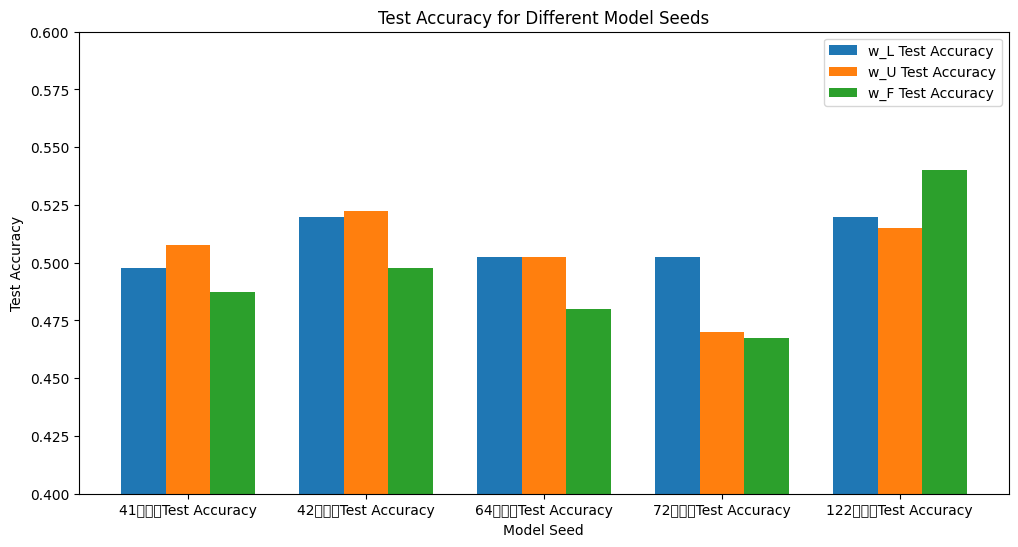

In [9]:
# Creating the bar plot with adjusted scale
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(plot_data))
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (label, color) in enumerate(zip(labels, colors)):
    plt.bar([pos + bar_width * i for pos in index], values[label], width=bar_width, label=label, color=color)

plt.xlabel('Model Seed')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Model Seeds')
plt.xticks([r + bar_width for r in range(len(plot_data))], plot_data.keys())
plt.legend()
plt.ylim(0.40, 0.60)  # Adjusting y-axis
plt.show()